In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-dataset/synthetic_vehicle_data_with_anomalies.csv


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle

In [2]:
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("/kaggle/input/synthetic-dataset/synthetic_vehicle_data_with_anomalies.csv")


In [4]:
# 🎯 Label Encoding: 1 = anomaly, 0 = normal
df['anomaly_label'] = df['anomaly_type'].apply(lambda x: 0 if x == 'normal' else 1)

# ✅ Features and Target
features = ['speed', 'engine_temp', 'fuel_efficiency', 'ambient_temp', 'rpm', 'brake_events']
X = df[features]
y = df['anomaly_label']

In [5]:

# 🔍 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 🔁 Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-27 08:27:04.591944: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6741 - loss: 0.6212 - val_accuracy: 0.7875 - val_loss: 0.4641
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.4416 - val_accuracy: 0.8458 - val_loss: 0.3804
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.3917 - val_accuracy: 0.8604 - val_loss: 0.3428
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.3556 - val_accuracy: 0.8729 - val_loss: 0.3209
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8479 - loss: 0.3345 - val_accuracy: 0.8875 - val_loss: 0.2851
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8748 - loss: 0.2980 - val_accuracy: 0.9146 - val_loss: 0.2574
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8975 - loss: 0.2749 - val_accuracy: 0.9146 - val_loss: 0.2329
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9001 - loss: 0.2514 - val_accuracy: 0.9354 - val_loss:

In [10]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9469 - loss: 0.1153  
Test Accuracy: 0.9533


In [12]:
# 📊 Predictions
y_pred_probs = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [13]:
# 📋 Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       457
           1       1.00      0.80      0.89       143

    accuracy                           0.95       600
   macro avg       0.97      0.90      0.93       600
weighted avg       0.96      0.95      0.95       600



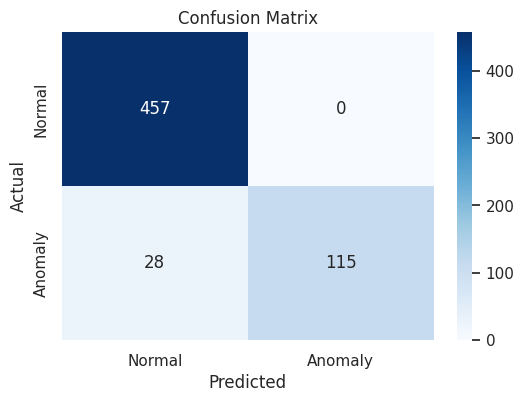

In [14]:
# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:

# Save model
with open("anomaly_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)